In [113]:
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
from datetime import date, datetime
fname = 'https://www.worldometers.info/coronavirus/'
req = Request(fname, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")

In [114]:
today = datetime.now()
now_str = "%s %d, %d at %d:%s" % (date.today().strftime("%b"), today.day, today.year, today.hour, '0'+str(today.minute) if today.minute < 10 else str(today.minute))
containers = page_soup.findAll("div", {"class": "maincounter-number"})
print("As of %s UTC, there have been %s total COVID-19 cases." % (now_str, containers[0].findAll("span")[0].text.replace(' ', '')))

As of Nov 20, 2022 at 10:49 UTC, there have been 642,995,526 total COVID-19 cases.


In [115]:
#-----General------#
import numpy as np
import pandas as pd
import os
import sys
import math
import random

#-----Plotting-----#
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
from pandas_profiling import ProfileReport

#-----Utility-----#
import itertools
import warnings
warnings.filterwarnings("ignore")
import re
import gc
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
from datetime import date, datetime

LOOK_AT = 5 # Controls how many bars the user can see in the bar graph
AT_LEAST = 50 # Controls what rank a country must be in terms of total cases to be shown on the bar graph

In [116]:
fname = 'https://www.worldometers.info/coronavirus/#countries'
req = Request(fname, headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")
today = datetime.now()
today_str = "%s %d, %d" % (date.today().strftime("%b"), today.day, today.year)
yesterday_str = "%s %d, %d" % (date.today().strftime("%b"), today.day-1, today.year)
clean = True

In [117]:
print(type(today_str))
print(yesterday_str)
print(type(yesterday_str))
print(today_str)

<class 'str'>
Nov 19, 2022
<class 'str'>
Nov 20, 2022


In [118]:
print("This version of the notebook is being run on %s." % today_str)

This version of the notebook is being run on Nov 20, 2022.


In [119]:
table = page_soup.findAll("table", {"id": "main_table_countries_yesterday"})
containers = table[0].findAll("tr", {"style": ""})
del containers[0]

all_data = []
for country in containers:
    country_data = []
    country_container = country.findAll("td")
    if country_container[1].text == 'China':
        continue
    for i in range(1, len(country_container)):
        final_feature = country_container[i].text
        if clean:
            if i != 1 and i != len(country_container)-1:
                final_feature = final_feature.replace(',', '')
                if final_feature.find('+') != -1:
                    final_feature = final_feature.replace('+', '')
                    final_feature = float(final_feature)
                elif final_feature.find('-') != -1:
                    final_feature = final_feature.replace('-', '')
                    final_feature = float(final_feature)*-1
        if final_feature == 'N/A':
            final_feature = 0
        elif final_feature == '' or final_feature == ' ':
            final_feature = -1 #None
        country_data.append(final_feature)
    all_data.append(country_data)

In [120]:
df = pd.DataFrame(all_data)
df = df.drop([i for i in range(15, len(all_data[0]))], axis=1) # Get rid of unnecessary data

In [121]:
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious/Critical",
                "Tot Cases/1M", "Deaths/1M", "Total Tests", "Tests/1M", "Population", "Continent"]
df.columns = column_labels

In [122]:
country_labels = page_soup.findAll("a", {"class": "mt_a"})
c_label = []
for country in country_labels:
    c_label.append(country.text)
c_label = set(c_label)

not_counted = []
sorted_countries = set(df['Country']) #Increase computational speed
for country in c_label:
    if country not in sorted_countries:
        not_counted.append(country)

In [123]:
print(not_counted + ['China'])

['Sao Tome and Principe', 'Turkey', 'China', 'DPRK', 'Falkland Islands', 'Vatican City', 'Western Sahara', 'Eritrea', 'China']


In [124]:
for label in df.columns:
    if label != 'Country' and label != 'Continent':
        df[label] = pd.to_numeric(df[label])

In [125]:
df['%Inc Cases'] = df['New Cases']/df['Total Cases']*100
df['%Inc Deaths'] = df['New Deaths']/df['Total Deaths']*100
df['%Inc Recovered'] = df['New Recovered']/df['Total Recovered']*100

In [126]:
pd.options.display.max_rows = None
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
0,World,642831227,276425.0,6625487,567.0,622006384,228903.0,14199356,36035,82469.0,850.0,-1,-1,-1,All,0.043001,0.008558,0.036801
1,USA,100162519,6194.0,1102505,66.0,97732099,23582.0,1327915,2755,299166.0,3293.0,1136329523,3394001,334805269,North America,0.006184,0.005986,0.024129
2,India,44670017,490.0,530574,21.0,44131952,1572.0,7491,698,31757.0,377.0,903809991,642535,1406631776,Asia,0.001097,0.003958,0.003562
3,France,37334635,47088.0,158163,-1.0,36651454,16382.0,525018,869,569260.0,2412.0,271490188,4139547,65584518,Europe,0.126124,-0.000632,0.044697
4,Germany,36205405,-1.0,156613,-1.0,35347400,16200.0,701392,1406,431615.0,1867.0,122332384,1458359,83883596,Europe,-0.000003,-0.000639,0.045831
5,Brazil,35060020,20406.0,688994,36.0,34167667,-1.0,203359,8318,162802.0,3199.0,63776166,296146,215353593,South America,0.058203,0.005225,-0.000003
6,S. Korea,26512754,50435.0,29990,65.0,25585742,58295.0,897022,419,516517.0,584.0,15804065,307892,51329899,Asia,0.190229,0.216739,0.227842
7,Italy,24031538,-1.0,180518,-1.0,23398125,-1.0,452895,247,398779.0,2996.0,255780377,4244418,60262770,Europe,-0.000004,-0.000554,-0.000004
8,UK,23977637,-1.0,196241,-1.0,23684633,4949.0,96763,146,350049.0,2865.0,522526476,7628357,68497907,Europe,-0.000004,-0.000510,0.020895
9,Japan,23694063,89887.0,48159,101.0,20606963,13405.0,3038941,261,188670.0,383.0,79720829,634797,125584838,Asia,0.379365,0.209722,0.065051


In [127]:
EXPORT = True
today = datetime.now()
if EXPORT:
    today = date.today()
    df.to_csv(f'covid_stats_{today.year}_{today.month}_{today.day-1}')
    print("Dataset is %.2f MB" % (df.memory_usage(deep=True).sum()/1000000))

Dataset is 0.06 MB


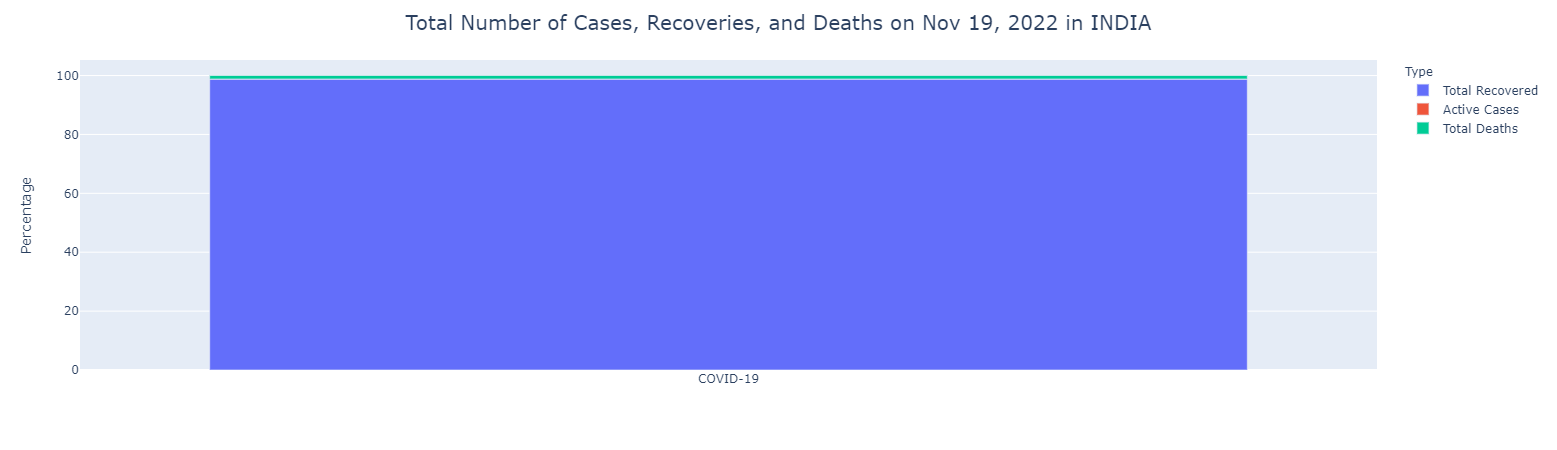

In [128]:
cases_ser = df[["Total Recovered", "Active Cases", "Total Deaths"]].loc[2]
cases_df = pd.DataFrame(cases_ser).reset_index()
cases_df.columns = ['Type', 'Total']
cases_df['Percentage'] = np.round(100*cases_df['Total']/np.sum(cases_df['Total']), 2)
cases_df['Virus'] = ['COVID-19' for i in range(len(cases_df))]

fig = px.bar(cases_df, x='Virus', y='Percentage', color='Type', hover_data=['Total'])
fig.update_layout(title={'text': f"Total Number of Cases, Recoveries, and Deaths on {yesterday_str} in INDIA", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", xaxis_title="")
fig.show()

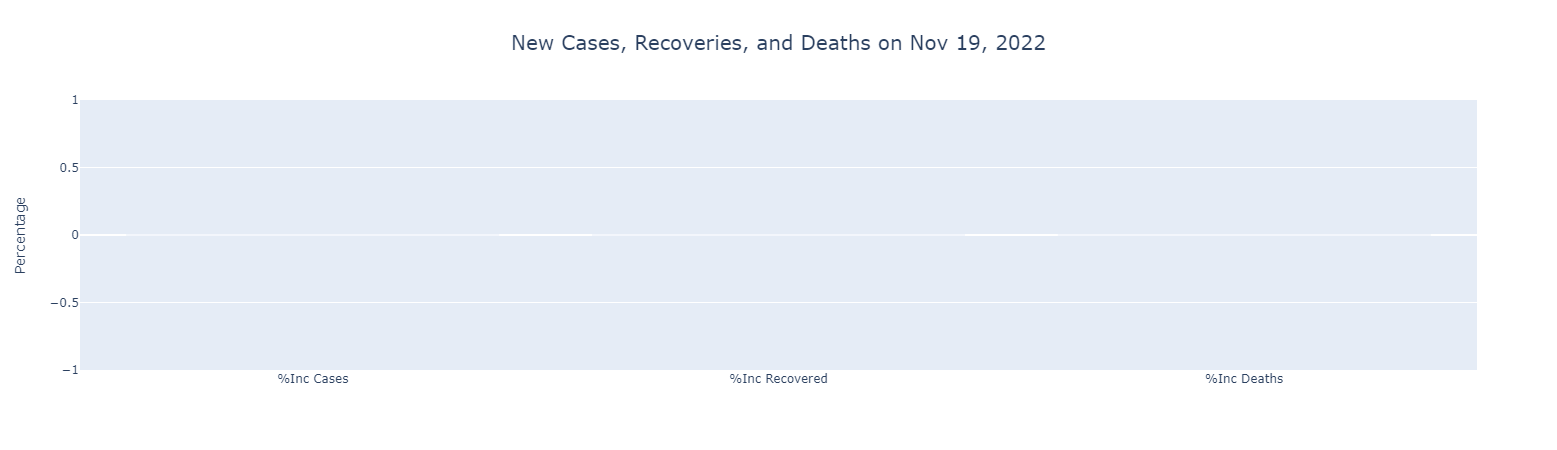

In [130]:
pinc_ser = np.round(df[["%Inc Cases", "%Inc Recovered", "%Inc Deaths"]].loc[2], 2)
pinc_df = pd.DataFrame(pinc_ser)
pinc_df.columns = ["Percentage"]

fig = go.Figure()
fig.add_trace(go.Bar(x=pinc_df.index, y=pinc_df['Percentage'], marker_color=["yellow", "green", "red"]))
fig.update_layout(title={'text': f"New Cases, Recoveries, and Deaths on {yesterday_str}", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", xaxis_title="")
fig.show()

In [131]:
continent_df = df.groupby('Continent').sum().drop('All')
continent_df = continent_df.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
0,Africa,12679334,352.0,257812,-51.0,10877307,348.0,339158,814,2360097.0,18045.0,109182848,10729891,1402212660,0.401705,86.571195,-49.831496
1,Asia,174998508,178227.0,1387879,278.0,167230286,122835.0,6164641,9290,6825044.0,32041.0,1997872995,88761394,3151332728,1.649472,-23.446642,1.295337
2,Australia/Oceania,12841302,2731.0,21995,-5.0,12499572,-2.0,221406,110,3565475.0,8200.0,88293817,20348041,43469030,1.466579,-64.228391,98.505618
3,Europe,236803634,59419.0,1955852,64.0,230980029,72641.0,3588447,7636,18018874.0,121133.0,2791641059,209898457,747543038,0.364611,-10.814969,1.020189
4,North America,118681479,6714.0,1560613,30.0,114048243,26998.0,2194655,7900,8600191.0,56988.0,1270678190,99140641,598140916,-0.240736,-163.379778,-0.264625
5,South America,64774344,26688.0,1334510,63.0,62983071,5077.0,376927,10116,1950678.0,32586.0,238731022,11274302,437690904,0.218692,-0.324956,0.124251


In [132]:
cases_vis_list = ['Total Cases', 'Active Cases', 'New Cases', 'Serious/Critical', 'Tot Cases/1M']
deaths_vis_list = ['Total Deaths', 'New Deaths', 'Deaths/1M']
recovered_vis_list = ['Total Recovered', 'New Recovered']
tests_vis_list = ['Total Tests', 'Tests/1M']
essentials = [['Total Cases', 'Active Cases', 'New Cases'], ['Total Deaths', 'New Deaths'], ['Total Recovered', 'New Recovered']]

In [133]:
def continent_visualization(vis_list):
    for label in vis_list:
        c_df = continent_df[['Continent', label]]
        c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]), 2)
        c_df['Virus'] = ['COVID-19' for i in range(len(c_df))]
        
        fig = px.bar(c_df, x='Virus', y='Percentage', color='Continent', hover_data=[label])
        fig.update_layout(title={'text': f"{label} at the end of {yesterday_str}", 'x': 0.5,
                                 'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", xaxis_title="")
        fig.show()
        gc.collect()

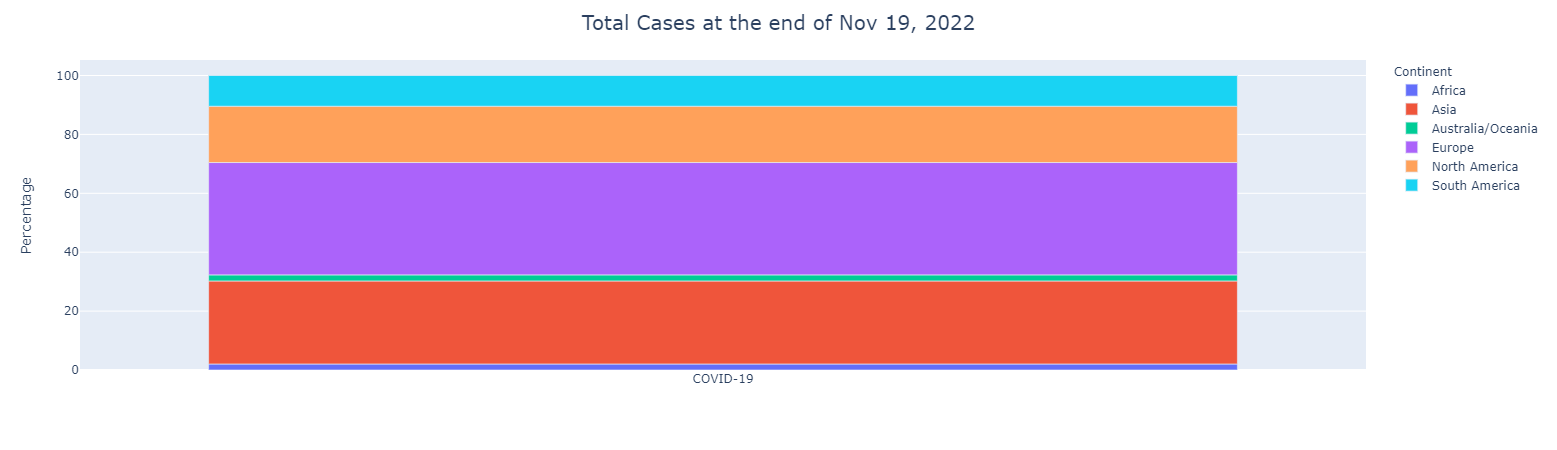

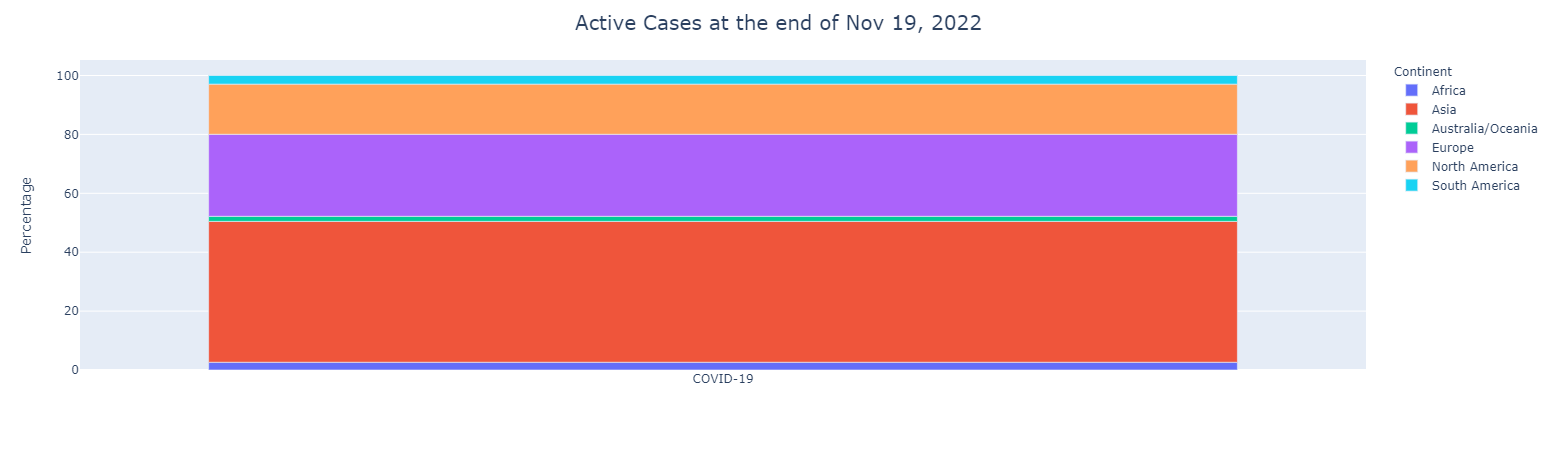

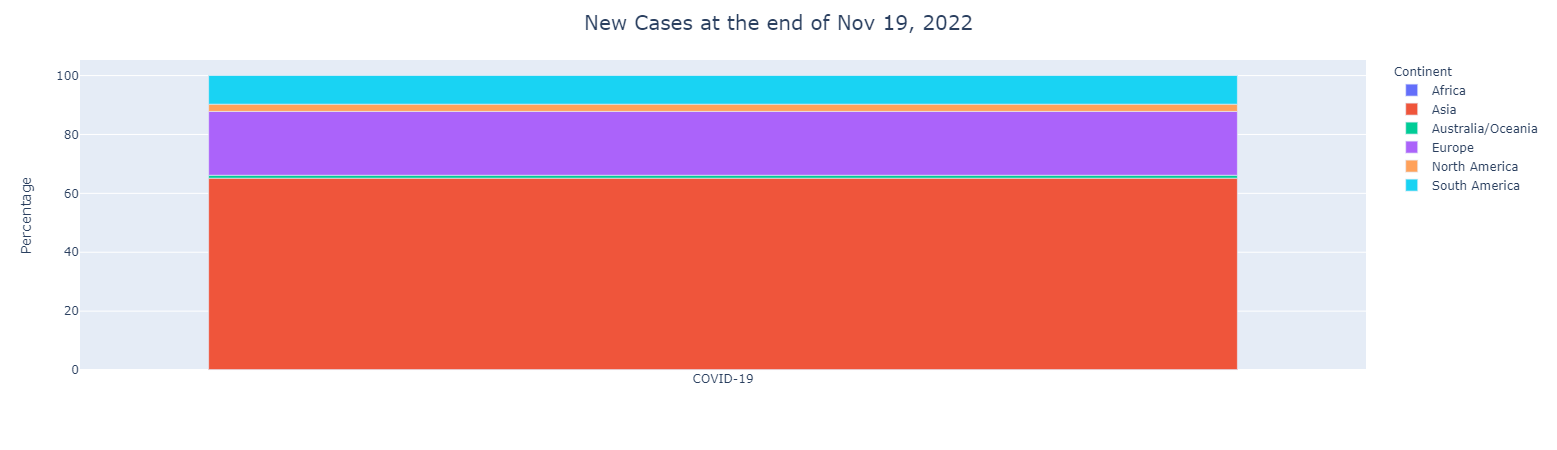

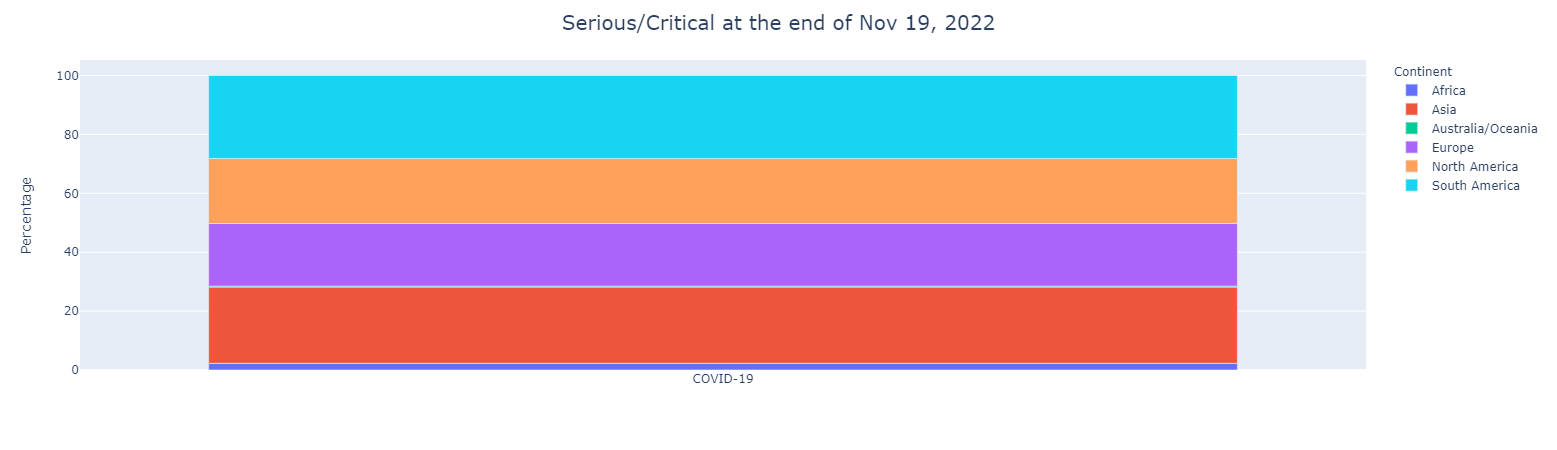

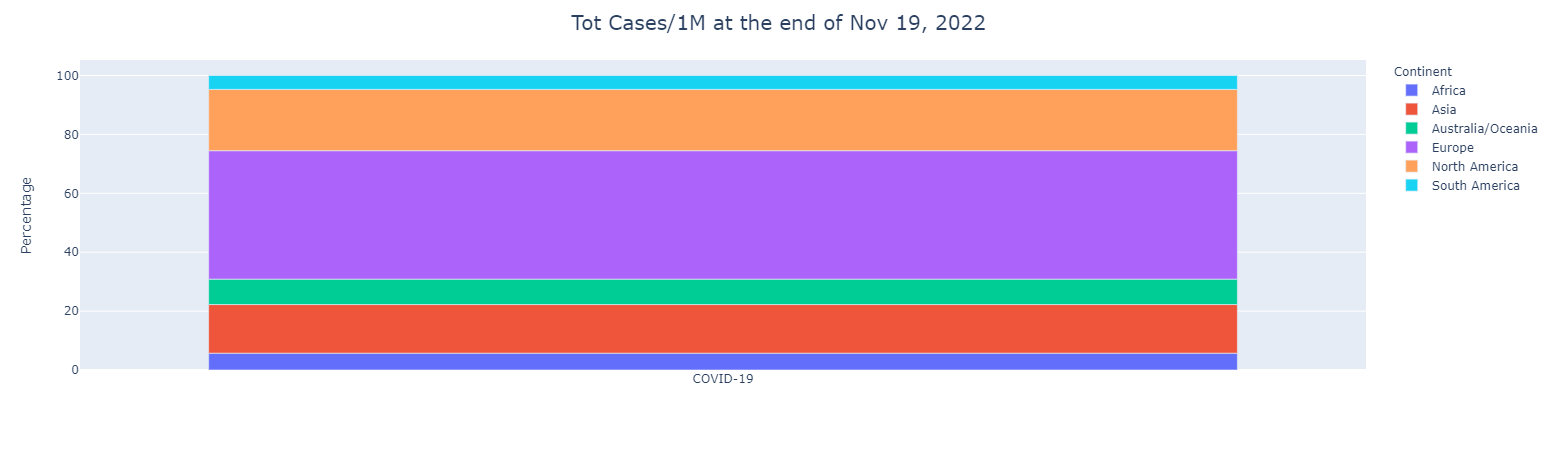

In [135]:
continent_visualization(cases_vis_list)

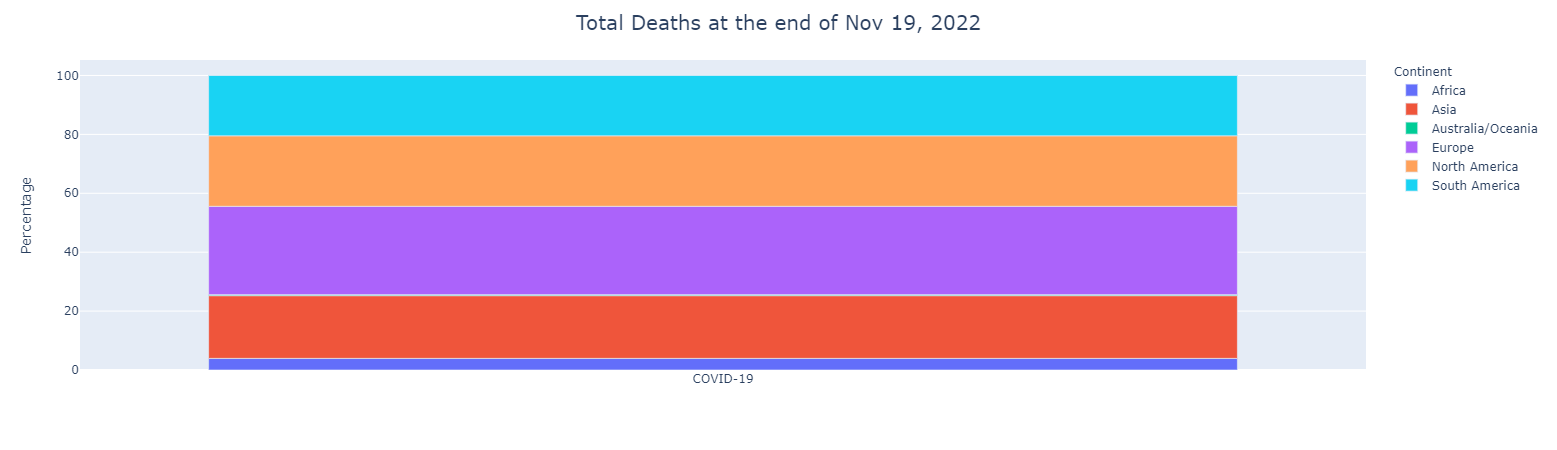

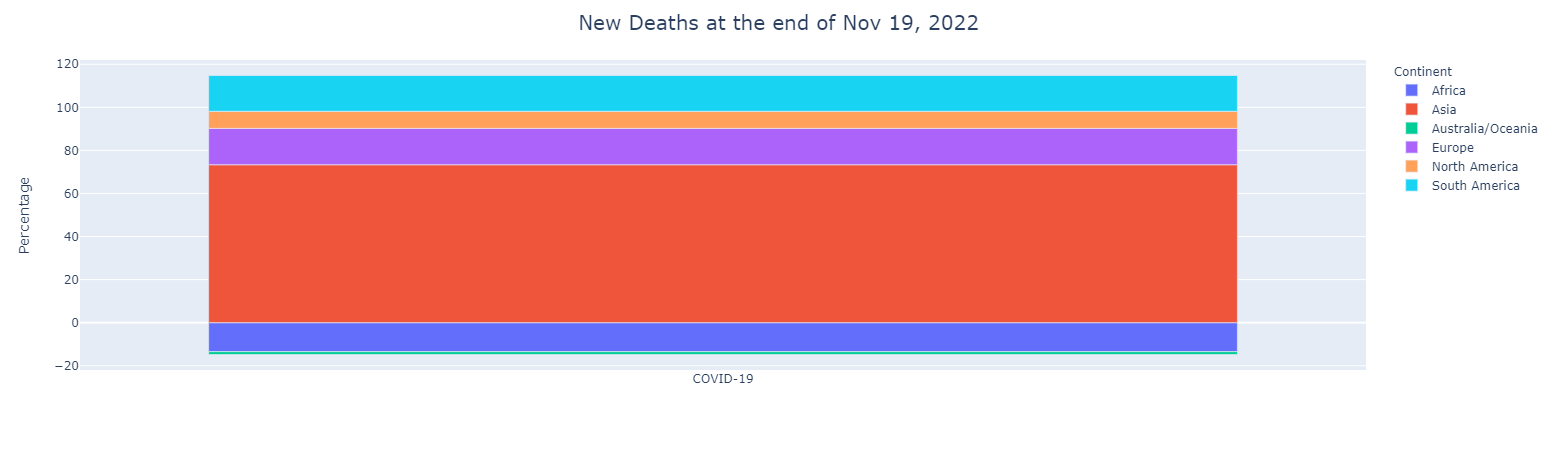

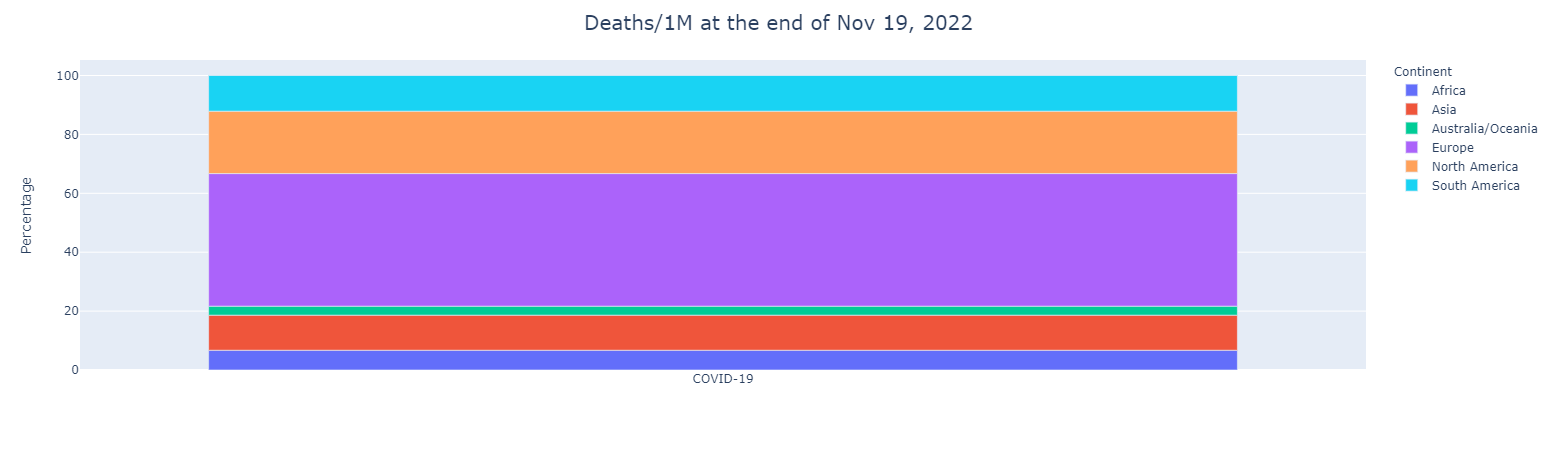

In [136]:
continent_visualization(deaths_vis_list)

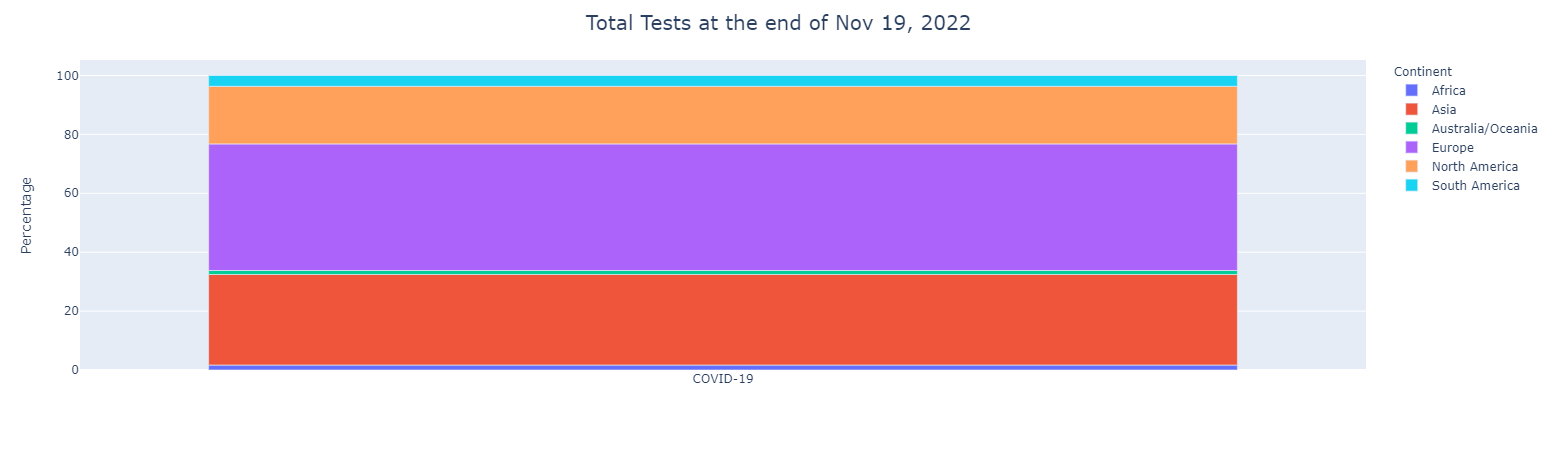

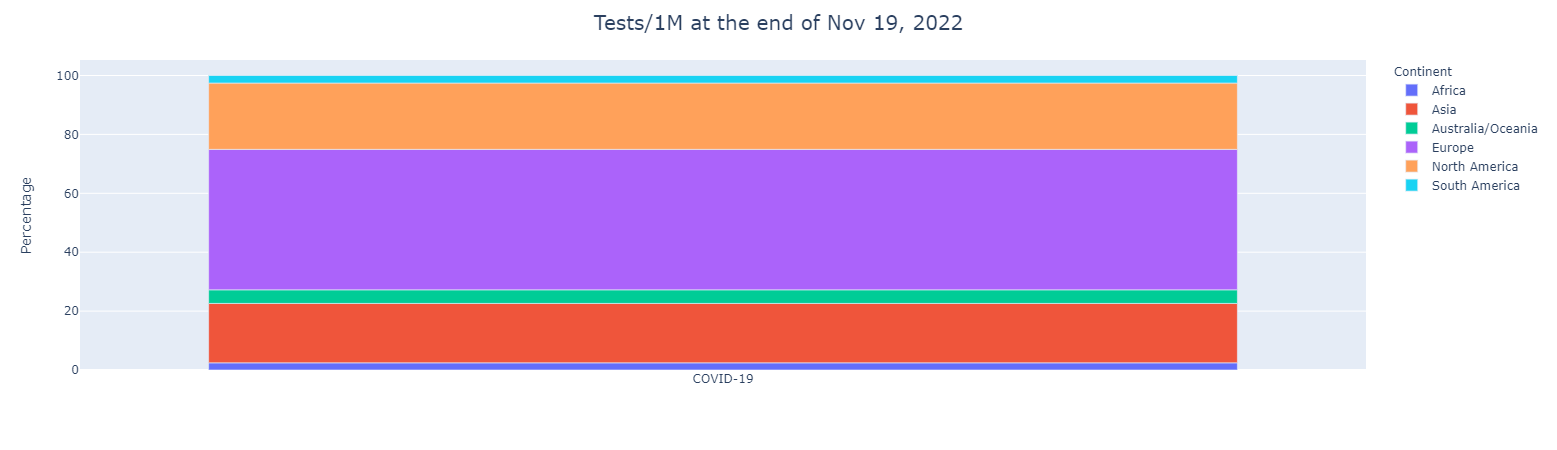

In [137]:
continent_visualization(tests_vis_list)

In [139]:
def continent_visualization2(index, label, log_scale=False):
    c_df = continent_df[['Continent'] + essentials[index]]
    
    fig = px.bar(c_df, x="Continent", y=essentials[index], log_y=log_scale)
    log_str = "- log scale" if log_scale else ""
    fig.update_layout(title={'text': f"{label} at the end of {yesterday_str} {log_str}", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title=label, xaxis_title="")
    
    fig.show()
    gc.collect()

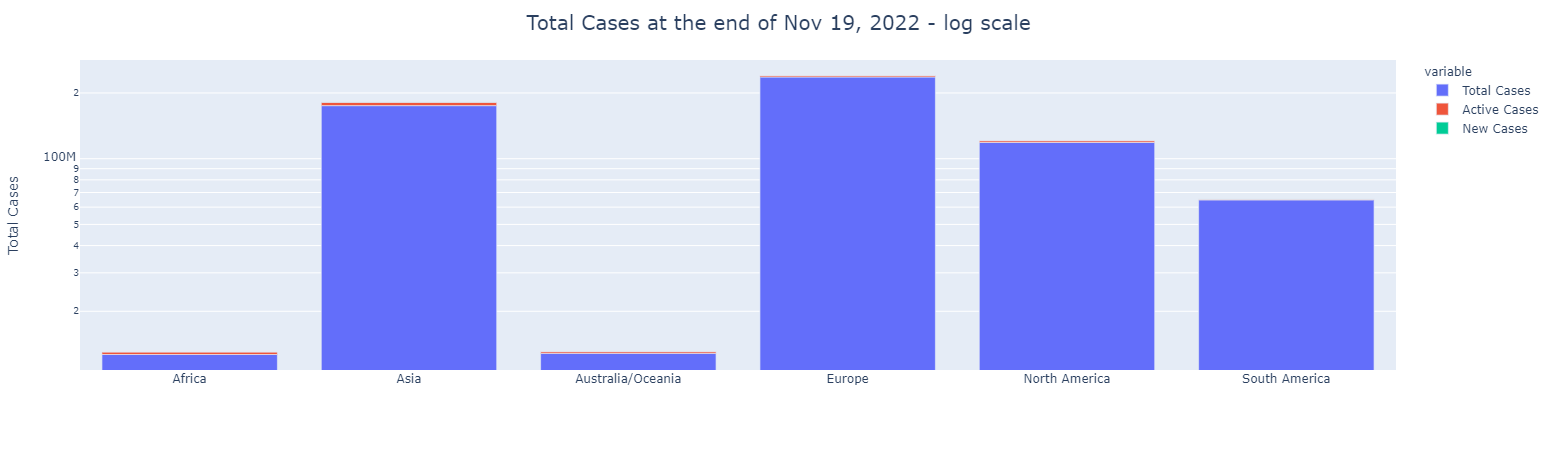

In [140]:
continent_visualization2(0, "Total Cases", log_scale=True)

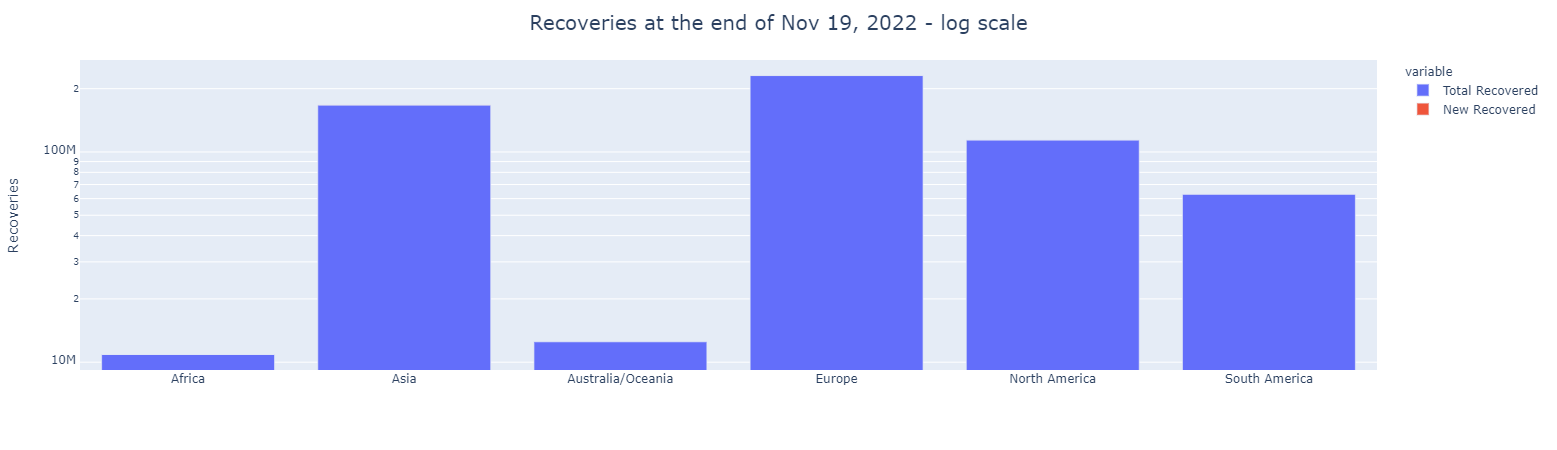

In [141]:

continent_visualization2(2, "Recoveries", log_scale=True)

In [142]:
df = df.drop([len(df)-1])
country_df = df.drop([0])

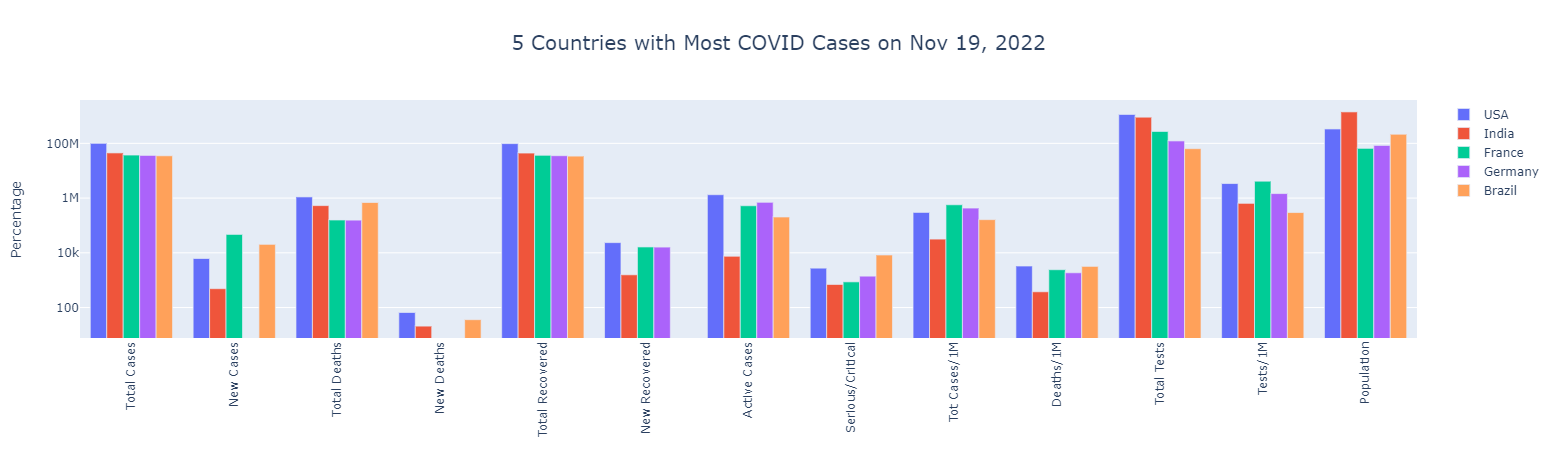

In [143]:
country_l = country_df.columns[1:14]

fig = go.Figure()
c = 0
for i in country_df.index:
    if c < LOOK_AT:
        fig.add_trace(go.Bar(name=country_df['Country'][i], x=country_l, y=country_df.loc[i][1:14]))
    else:
        break
    c += 1
    
fig.update_layout(title={'text': f'{LOOK_AT} Countries with Most COVID Cases on %s' % yesterday_str, 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", yaxis_type="log", xaxis_tickangle=-90)
fig.show()

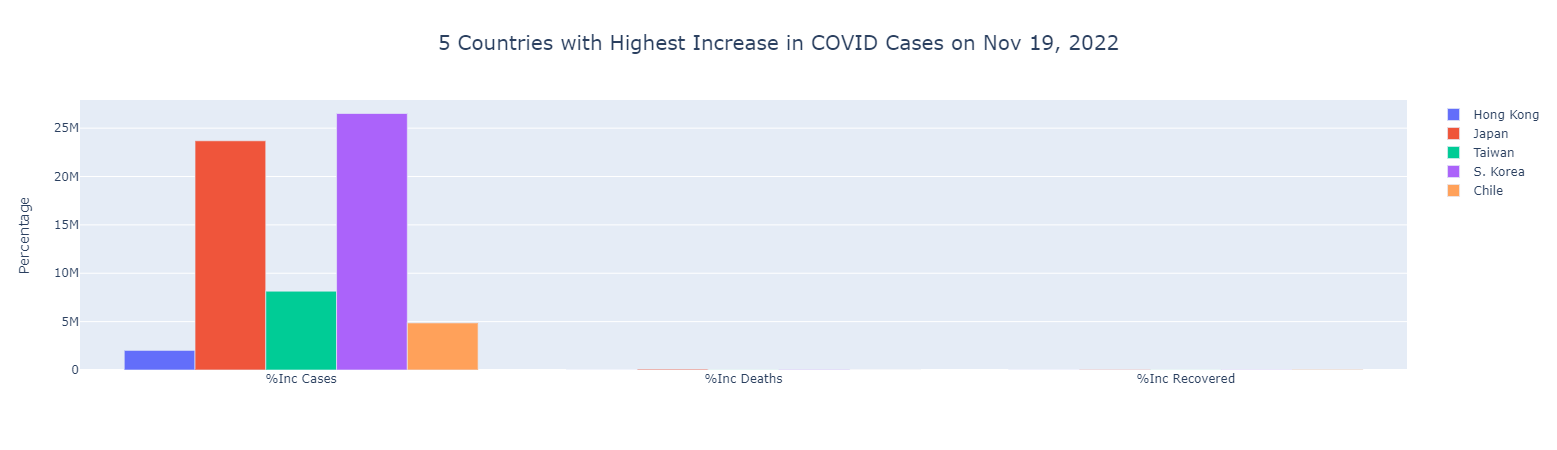

In [144]:
inc_l = country_df.columns[15:]
inc_df = country_df.sort_values("%Inc Cases", ascending=False)
fig = go.Figure()
c = 0
for i in inc_df.index:
    if i > AT_LEAST:
        continue
    if c < LOOK_AT:
        fig.add_trace(go.Bar(name=country_df['Country'][i], x=inc_l, y=inc_df.loc[i][15:]))
    else:
        break
    c += 1
    
fig.update_layout(title={'text': f'{LOOK_AT} Countries with Highest Increase in COVID Cases on %s' % yesterday_str, 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_title="Percentage", xaxis_tickangle=0)
fig.show()

In [145]:
country_labels = country_df.columns[1:14]

def country_visualization(continent):
    buttons_list = []
    base_list = [False for i in range(len(country_df))]
    c = 0
    for i in country_df.index:
        if country_df.loc[i]['Continent'] != continent:
            continue
        tmp_list = base_list.copy()
        tmp_list[c] = True
        c += 1
        buttons_list.append(dict(
                    args=[{"visible": tmp_list}],
                    label=country_df.loc[i]['Country'],
                    method="update"
                ))


    fig = go.Figure()
    c = 0
    for i in country_df.index:
        if country_df.loc[i]['Continent'] != continent:
            continue
        fig.add_trace(go.Bar(name=country_df.loc[i]['Country'], x=country_labels, y=country_df.loc[i][1:14], visible=False if c != 0 else True))
        c += 1

    fig.update_layout(
        updatemenus=[
            dict(
                buttons=buttons_list,
                direction="down",
                pad={"r": 10, "t": 10},
                showactive=True,
                x=0.1,
                xanchor="left",
                y=1.1,
                yanchor="top"
            ),
        ]
    )

    fig.update_layout(title={'text': '%s COVID-19 Cases Search on %s' % (continent, yesterday_str), 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, yaxis_type="log", xaxis_tickangle=-90)
    fig.show()

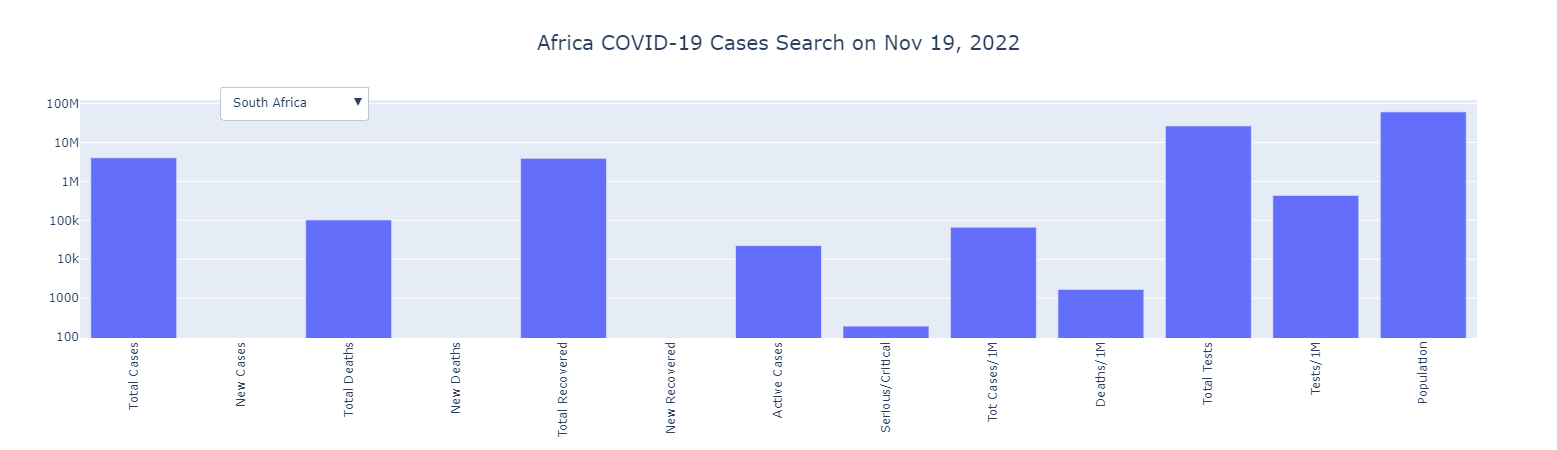

In [146]:
country_visualization('Africa')

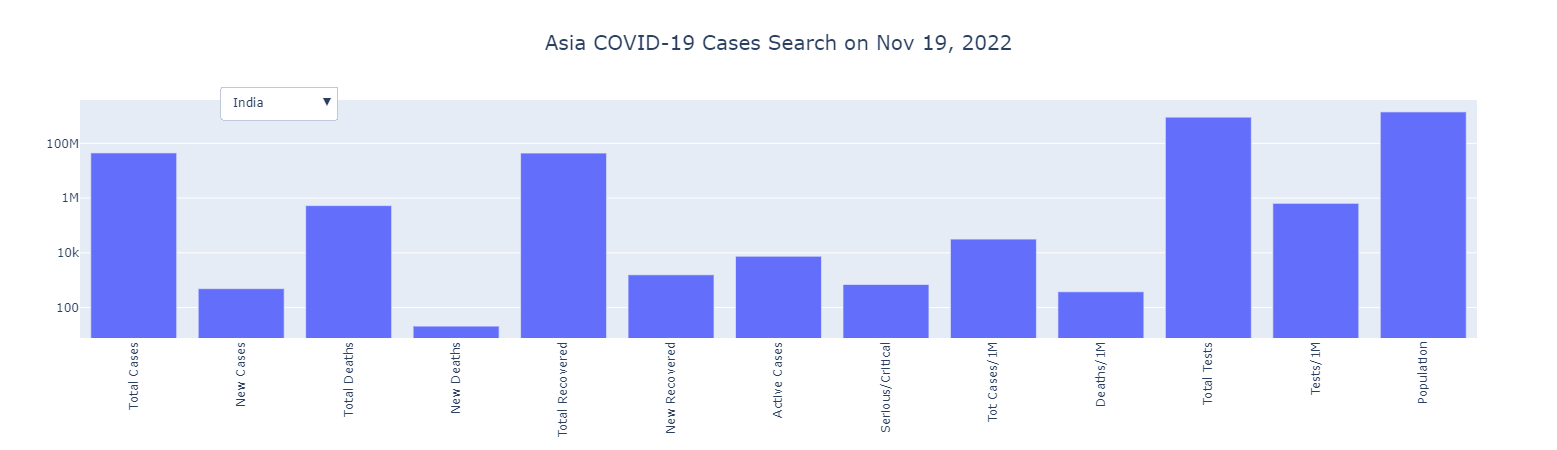

In [147]:
country_visualization('Asia')

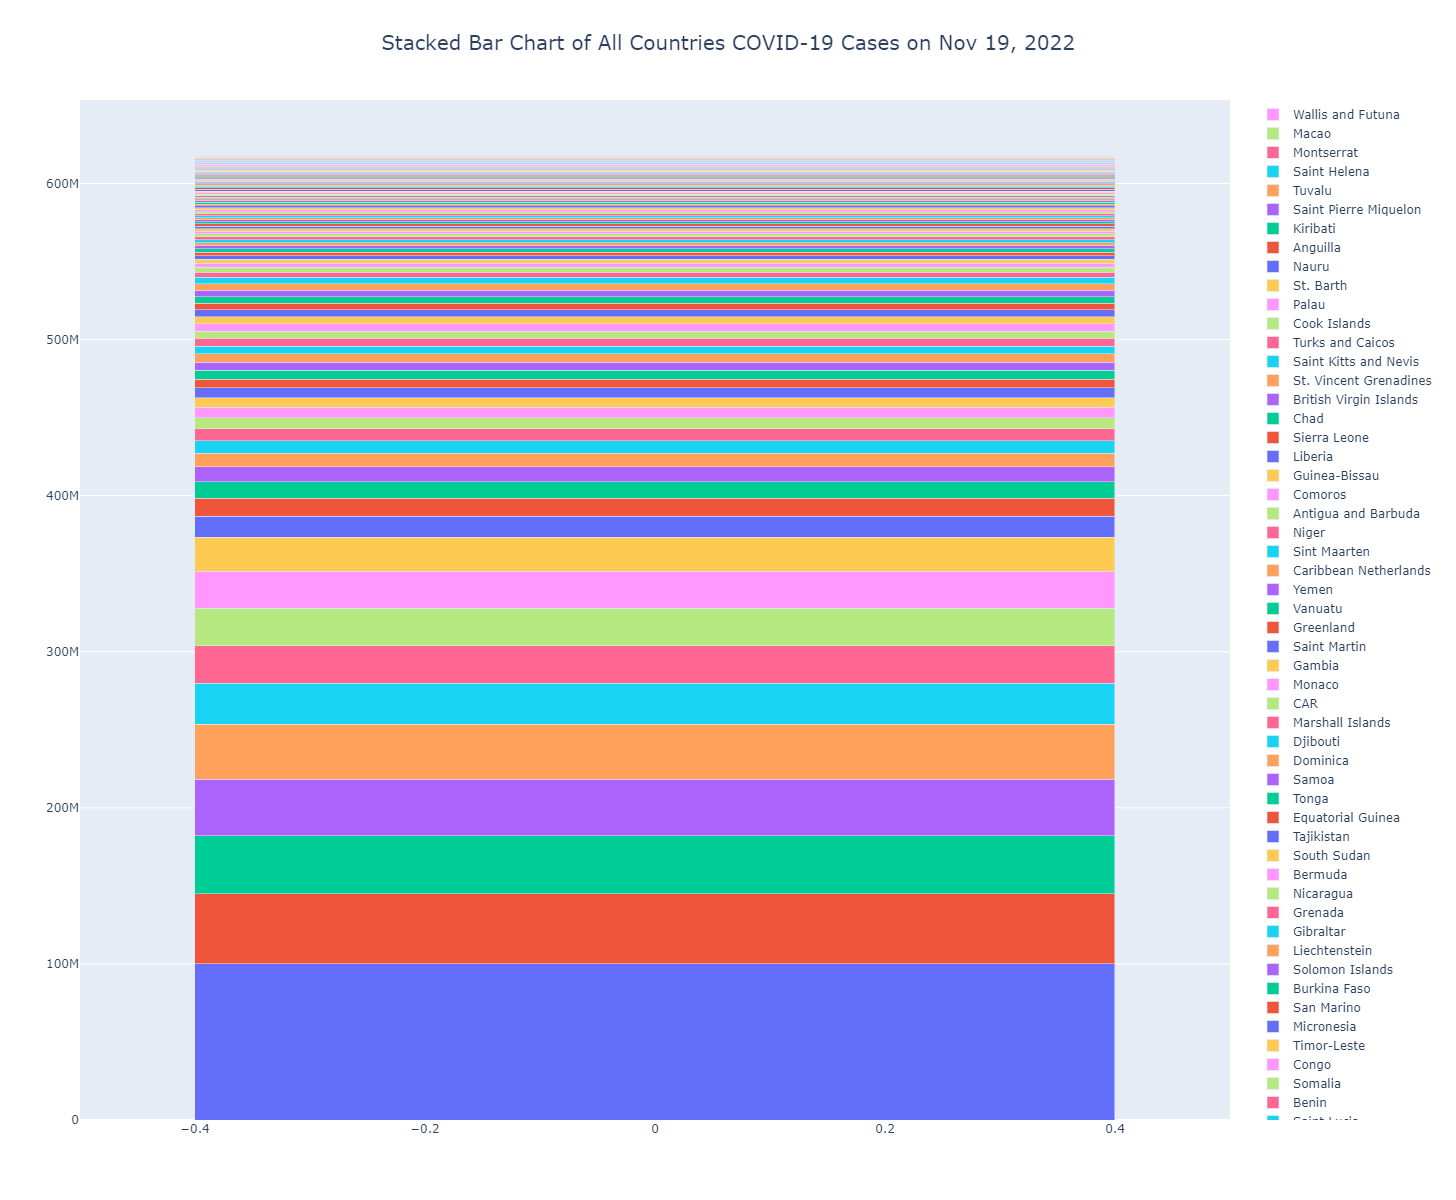

In [36]:
bar_list = []
for i in country_df.index:
    bar_list.append(go.Bar(name=country_df['Country'][i], y=[country_df['Total Cases'][i]]))
    
fig = go.Figure(data=bar_list)
fig.update_layout(title={'text': 'Stacked Bar Chart of All Countries COVID-19 Cases on %s' % yesterday_str, 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 20}}, barmode='stack', height=1200)
fig.show()

In [37]:
country_abbrev = {
'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas, The': 'BHM',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'British Virgin Islands': 'VGB',
 'Brunei': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burma': 'MMR',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros': 'COM',
 'Congo, Democratic Republic of the': 'COD',
 'Congo, Republic of the': 'COG',
 'Cook Islands': 'COK',
 'Costa Rica': 'CRI',
 "Cote d'Ivoire": 'CIV',
 'Croatia': 'HRV',
 'Cuba': 'CUB',
 'Curacao': 'CUW',
 'Cyprus': 'CYP',
 'Czech Republic': 'CZE',
    'Czechia': 'CZE',
 'Denmark': 'DNK',
 'Djibouti': 'DJI',
 'Dominica': 'DMA',
 'Dominican Republic': 'DOM',
 'Ecuador': 'ECU',
 'Egypt': 'EGY',
 'El Salvador': 'SLV',
 'Equatorial Guinea': 'GNQ',
 'Eritrea': 'ERI',
 'Estonia': 'EST',
 'Ethiopia': 'ETH',
 'Falkland Islands (Islas Malvinas)': 'FLK',
 'Faroe Islands': 'FRO',
 'Fiji': 'FJI',
 'Finland': 'FIN',
 'France': 'FRA',
 'French Polynesia': 'PYF',
 'Gabon': 'GAB',
 'Gambia, The': 'GMB',
 'Georgia': 'GEO',
 'Germany': 'DEU',
 'Ghana': 'GHA',
 'Gibraltar': 'GIB',
 'Greece': 'GRC',
 'Greenland': 'GRL',
 'Grenada': 'GRD',
 'Guam': 'GUM',
 'Guatemala': 'GTM',
 'Guernsey': 'GGY',
 'Guinea-Bissau': 'GNB',
 'Guinea': 'GIN',
 'Guyana': 'GUY',
 'Haiti': 'HTI',
 'Honduras': 'HND',
 'Hong Kong': 'HKG',
 'Hungary': 'HUN',
 'Iceland': 'ISL',
 'India': 'IND',
 'Indonesia': 'IDN',
 'Iran': 'IRN',
 'Iraq': 'IRQ',
 'Ireland': 'IRL',
 'Isle of Man': 'IMN',
 'Israel': 'ISR',
 'Italy': 'ITA',
 'Jamaica': 'JAM',
 'Japan': 'JPN',
 'Jersey': 'JEY',
 'Jordan': 'JOR',
 'Kazakhstan': 'KAZ',
 'Kenya': 'KEN',
 'Kiribati': 'KIR',
 'Korea, North': 'PRK',
 'Korea, South': 'KOR',
 'Kosovo': 'KSV',
 'Kuwait': 'KWT',
 'Kyrgyzstan': 'KGZ',
 'Laos': 'LAO',
 'Latvia': 'LVA',
 'Lebanon': 'LBN',
 'Lesotho': 'LSO',
 'Liberia': 'LBR',
 'Libya': 'LBY',
 'Liechtenstein': 'LIE',
 'Lithuania': 'LTU',
 'Luxembourg': 'LUX',
 'Macau': 'MAC',
 'Macedonia': 'MKD',
 'Madagascar': 'MDG',
 'Malawi': 'MWI',
 'Malaysia': 'MYS',
 'Maldives': 'MDV',
 'Mali': 'MLI',
 'Malta': 'MLT',
 'Marshall Islands': 'MHL',
 'Mauritania': 'MRT',
 'Mauritius': 'MUS',
 'Mexico': 'MEX',
 'Micronesia, Federated States of': 'FSM',
 'Moldova': 'MDA',
 'Monaco': 'MCO',
 'Mongolia': 'MNG',
 'Montenegro': 'MNE',
 'Morocco': 'MAR',
 'Mozambique': 'MOZ',
 'Namibia': 'NAM',
 'Nepal': 'NPL',
 'Netherlands': 'NLD',
 'New Caledonia': 'NCL',
 'New Zealand': 'NZL',
 'Nicaragua': 'NIC',
 'Nigeria': 'NGA',
 'Niger': 'NER',
 'Niue': 'NIU',
 'Northern Mariana Islands': 'MNP',
 'Norway': 'NOR',
 'Oman': 'OMN',
 'Pakistan': 'PAK',
 'Palau': 'PLW',
 'Panama': 'PAN',
 'Papua New Guinea': 'PNG',
 'Paraguay': 'PRY',
 'Peru': 'PER',
 'Philippines': 'PHL',
 'Poland': 'POL',
 'Portugal': 'PRT',
 'Puerto Rico': 'PRI',
 'Qatar': 'QAT',
 'Romania': 'ROU',
 'Russia': 'RUS',
 'Rwanda': 'RWA',
 'Saint Kitts and Nevis': 'KNA',
 'Saint Lucia': 'LCA',
 'Saint Martin': 'MAF',
 'Saint Pierre and Miquelon': 'SPM',
 'Saint Vincent and the Grenadines': 'VCT',
 'Samoa': 'WSM',
 'San Marino': 'SMR',
 'Sao Tome and Principe': 'STP',
 'Saudi Arabia': 'SAU',
 'Senegal': 'SEN',
 'Serbia': 'SRB',
 'Seychelles': 'SYC',
 'Sierra Leone': 'SLE',
 'Singapore': 'SGP',
 'Sint Maarten': 'SXM',
 'Slovakia': 'SVK',
 'Slovenia': 'SVN',
 'Solomon Islands': 'SLB',
 'Somalia': 'SOM',
 'South Africa': 'ZAF',
 'South Sudan': 'SSD',
 'Spain': 'ESP',
 'Sri Lanka': 'LKA',
 'Sudan': 'SDN',
 'Suriname': 'SUR',
 'Swaziland': 'SWZ',
 'Sweden': 'SWE',
 'Switzerland': 'CHE',
 'Syria': 'SYR',
 'Taiwan': 'TWN',
 'Tajikistan': 'TJK',
 'Tanzania': 'TZA',
 'Thailand': 'THA',
 'Timor-Leste': 'TLS',
 'Togo': 'TGO',
 'Tonga': 'TON',
 'Trinidad and Tobago': 'TTO',
 'Tunisia': 'TUN',
 'Turkey': 'TUR',
 'Turkmenistan': 'TKM',
 'Tuvalu': 'TUV',
 'Uganda': 'UGA',
 'Ukraine': 'UKR',
 'United Arab Emirates': 'ARE',
    'UAE': 'ARE',
 'United Kingdom': 'GBR',
    'UK': 'GBR',
 'United States': 'USA',
    'USA': 'USA',
 'Uruguay': 'URY',
 'Uzbekistan': 'UZB',
 'Vanuatu': 'VUT',
 'Venezuela': 'VEN',
 'Vietnam': 'VNM',
 'Virgin Islands': 'VGB',
 'West Bank': 'WBG',
 'Yemen': 'YEM',
 'Zambia': 'ZMB',
 'Zimbabwe': 'ZWE',
    'S. Korea': 'KOR'
}

In [38]:
country_df['iso_code'] = country_df['Country'].map(country_abbrev)
map_country_df = country_df.loc[~country_df['iso_code'].isna()]
map_country_df['death_rate'] = (100*map_country_df['Total Deaths']/map_country_df['Total Cases']).round(2)
map_country_df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Tot Cases/1M,Deaths/1M,Total Tests,Tests/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered,iso_code,death_rate
1,USA,100162519,6194.0,1102505,66.0,97732099,23582.0,1327915,2755,299166.0,3293.0,1136329523,3394001,334805269,North America,0.006184,0.005986,0.024129,USA,1.10
2,India,44670017,490.0,530574,21.0,44131952,1572.0,7491,698,31757.0,377.0,903809991,642535,1406631776,Asia,0.001097,0.003958,0.003562,IND,1.19
3,France,37334635,47088.0,158163,-1.0,36651454,16382.0,525018,869,569260.0,2412.0,271490188,4139547,65584518,Europe,0.126124,-0.000632,0.044697,FRA,0.42
4,Germany,36205405,-1.0,156613,-1.0,35347400,16200.0,701392,1406,431615.0,1867.0,122332384,1458359,83883596,Europe,-0.000003,-0.000639,0.045831,DEU,0.43
5,Brazil,35060020,20406.0,688994,36.0,34167667,-1.0,203359,8318,162802.0,3199.0,63776166,296146,215353593,South America,0.058203,0.005225,-0.000003,BRA,1.97


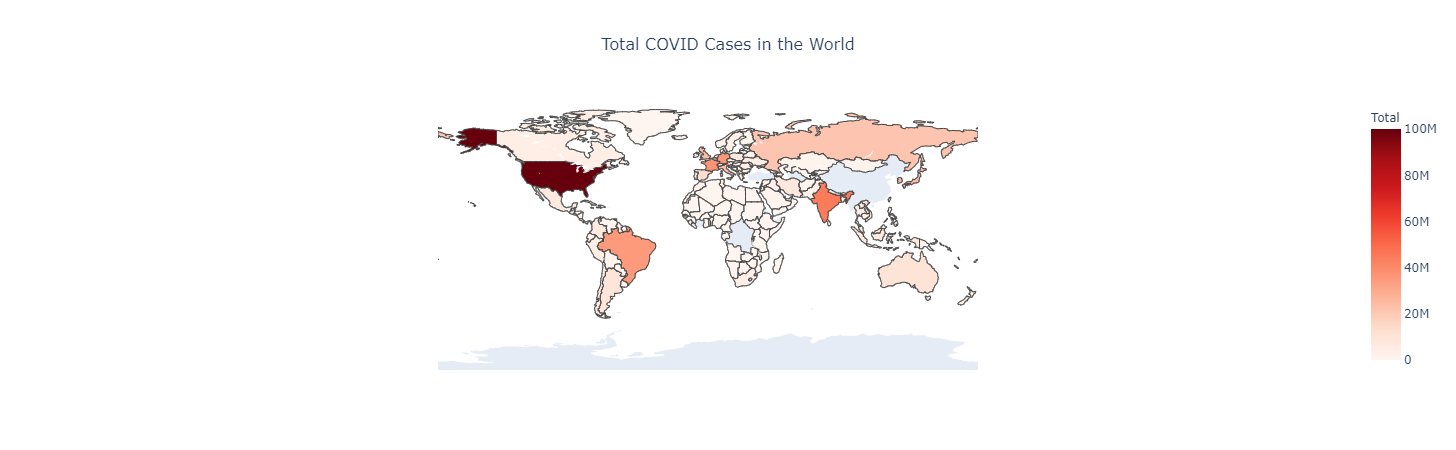

In [39]:
fig = go.Figure(data=go.Choropleth(
    locations=map_country_df['iso_code'],
    z=map_country_df['Total Cases'].astype(float),
    colorscale="Reds",
    colorbar_title="Total"
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={'text': f"Total COVID Cases in the World", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 16}}
)

fig.show()

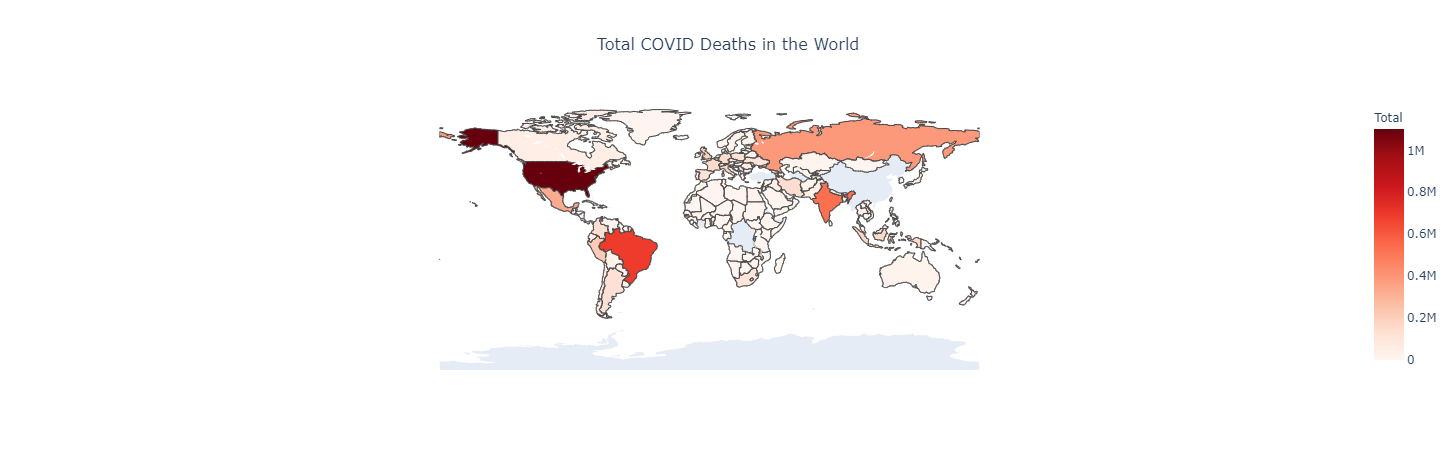

In [40]:
fig = go.Figure(data=go.Choropleth(
    locations=map_country_df['iso_code'],
    z=map_country_df['Total Deaths'].astype(float),
    colorscale="Reds",
    colorbar_title="Total"
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={'text': f"Total COVID Deaths in the World", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 16}}
)

fig.show()

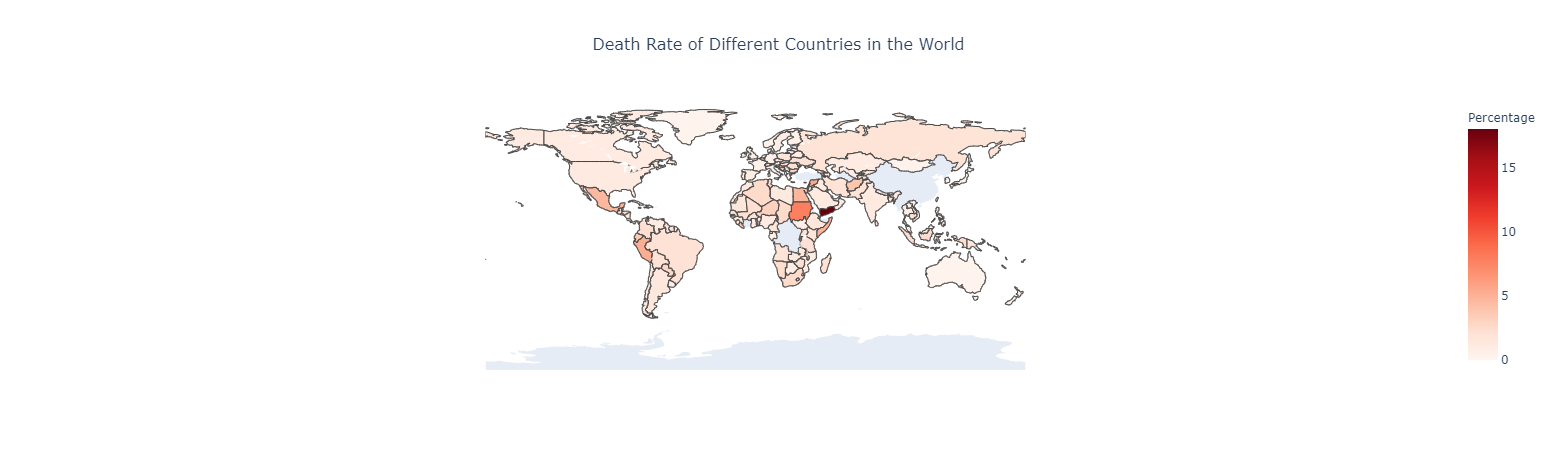

In [148]:
fig = go.Figure(data=go.Choropleth(
    locations=map_country_df['iso_code'],
    z=map_country_df['death_rate'].astype(float),
    colorscale="Reds",
    colorbar_title="Percentage"
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={'text': f"Death Rate of Different Countries in the World", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 16}}
)

fig.show()


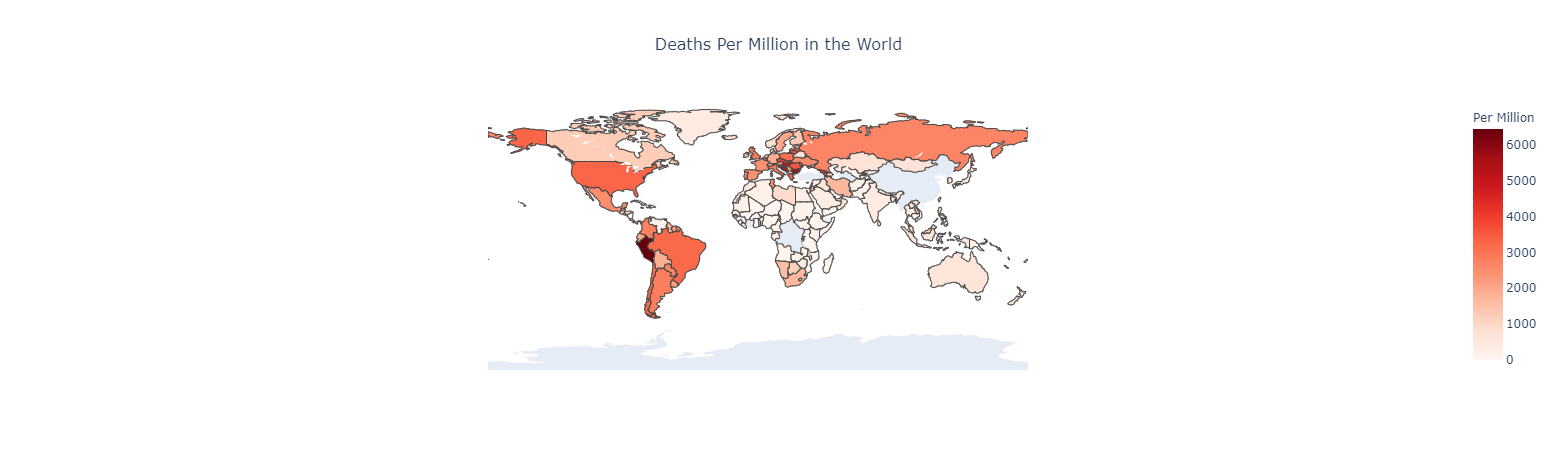

In [149]:
fig = go.Figure(data=go.Choropleth(
    locations=map_country_df['iso_code'],
    z=map_country_df['Deaths/1M'].astype(float),
    colorscale="Reds",
    colorbar_title="Per Million"
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    title={'text': f"Deaths Per Million in the World", 'x': 0.5,
                         'xanchor': 'center', 'font': {'size': 16}}
)

fig.show()